# Stroop Test

### Introduction:

This project will examine the results of a Stroop test. For more information, see: https://en.wikipedia.org/wiki/Stroop_effect.

The independent variable in this study is whether the colors of the words are congruent or incongruent. The dependent variable is the time individuals take to correctly identify the colors of the words.

The null hypothesis of this experiment is that the sample mean of the congruent results = the sample mean of the incongruent results. The alternative hypothesis is that the sample mean of the congruent results < the sample mean of the incongruent results. 

A one-tailed, dependent, two-sample t-test will be performed to decide whether there is statistical evidence to accept or reject the null. 

A two-sample t-test is the appropriate hypothesis test due to the repeated measures design of the experiment (the same subjects are present in both samples, under different conditions), and only the sample parameters (rather than the population parameters) are known. The directionality of the test is chosen because it is reasonable to assume that words written in the color that they describe will be easier to identify than words describing a color different from that they are written in.

### Descriptive Statistics:

In [1]:
#Import dataset to python
import csv

with open("C:\\Users\\Josh\\Documents\\stroopdata.csv") as f:
    #skip header row
    next(f)
    document = csv.reader(f)
    congruent = []
    incongruent = []
    for row in document:
        congruent.append(float(row[0]))
        incongruent.append(float(row[1]))

In [6]:
#report descriptive statistics
import statistics as stats

meanC, meanI = stats.mean(congruent), stats.mean(incongruent)
medianC, medianI = stats.median(congruent), stats.median(incongruent)

print("The mean of the congruent results is %f. The mean of the incongruent results is %f." % (meanC, meanI))
print("The median of the congruent results is %f. The median of the incongruent results is %f." % (medianC, medianI))

varC, varI = stats.variance(congruent), stats.variance(incongruent)
sC, sI = stats.stdev(congruent), stats.stdev(incongruent)

print("The variance of the congruent results is %f. The variance of the incongruent results is %f." % (varC, varI))
print("The standard deviation of the congruent results is %f. The standard deviation of the incongruent results is %f." % (sC, sI))

The mean of the congruent results is 14.051125. The mean of the incongruent results is 22.015917.
The median of the congruent results is 14.356500. The median of the incongruent results is 21.017500.
The variance of the congruent results is 12.669029. The variance of the incongruent results is 23.011757.
The standard deviation of the congruent results is 3.559358. The standard deviation of the incongruent results is 4.797057.


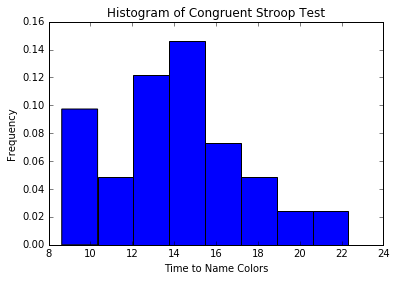

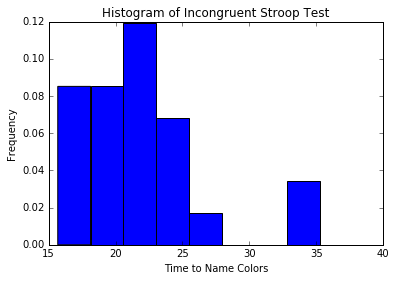

In [3]:
#plot histograms of data to visualize distributions
%matplotlib inline

import matplotlib.pyplot as plt

bins = 8
plt.hist(congruent, bins, normed = 1)
plt.xlabel("Time to Name Colors")
plt.ylabel("Frequency")
plt.title("Histogram of Congruent Stroop Test")
plt.show()

bins = 8
plt.hist(incongruent, bins, normed = 1)
plt.xlabel("Time to Name Colors")
plt.ylabel("Frequency")
plt.title("Histogram of Incongruent Stroop Test")
plt.show()

### Analysis and Results:

In [5]:
#perform one-tailed two-sample t-test
from scipy import stats as st

t, p = st.ttest_rel(congruent,incongruent)
p *= 2

print("The t-statistic is %f. The probability is %f." % (t, p))

alpha = 0.05
print("We have chosen an alpha level of %f in one-tail." % alpha)
df = len(congruent) + len(incongruent) - 2
t_critical = st.t.ppf(alpha,df)
print("The t-critical value is %f." % t_critical)

if p < alpha:
    print ("Reject the null hypothesis. The difference between the time taken to identify congruent and incongruent colors is \
significant at p = %f." % p)
else:
    print ("Retain the null hypothesis. The difference between the time taken to identify congruent and incongruent colors is \
not significant at p < %f." % alpha)

The t-statistic is -8.020707. The probability is 0.000000.
We have chosen an alpha level of 0.050000 in one-tail.
The t-critical value is -1.678660.
Reject the null hypothesis. The difference between the time taken to identify congruent and incongruent colors is significant at p = 0.000000.


### Conclusion:

Following the result of the t-test, there is a statistically significant diffence between the sample means of congruent color results and incongruent color results. This suggests that people have a more difficult time identifying colors that words represent when those words are written in colors that they do not describe. This confirms my initial suspicions that the incongruent portion of the Stroop test would be more challenging.